In [1]:
import pandas as pd
import string
import numpy as np
from collections import Counter, OrderedDict
import matplotlib.pyplot as plt
import copy
import requests as r
import seaborn as sns
%matplotlib inline

#Need to add the following special charactesr to the list of puncuations: ~‘êàé—’”“
string_punctuation = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~‘êàé—’”“'

In [2]:
# Pride and Prejudice by Jane Austen (https://dev.gutenberg.org/ebooks/1342)
url = 'https://dev.gutenberg.org/files/1342/1342-0.txt'
data = r.get(url)
f = data.text
# f[1:]

In [3]:
remove_bom = f.replace('\ufeff', '###')
comma_delimit = remove_bom.replace('\n', ',').strip().lower().replace('\r', '').split(',') 
clean_text = [each for each in comma_delimit if (str.rstrip(each) != '') or (str.rstrip(each) not in string_punctuation)]
df = pd.DataFrame({'text': clean_text})

In [4]:
def clean(s):
    '''
    Remove punctuation, numeric values and all extra spaces from string. 
    '''
    # remove punctuation
    no_punc = s.translate(str.maketrans('', '', string_punctuation))
    # remove num
    no_num = ''.join([each for each in no_punc if not each.isdigit()])
    # remove extra spaces
    return ' '.join(no_num.split())

def count_alpha(x):
    return Counter(x)

In [5]:
def count(s):
    count_a = s.count('a')
    count_b = s.count('b')
    count_c = s.count('c')
    count_d = s.count('d')
    count_e = s.count('e')
    count_f = s.count('f')
    count_g = s.count('g')
    count_h = s.count('h')
    count_i = s.count('i')
    count_j = s.count('j')
    count_k = s.count('k')
    count_l = s.count('l')
    count_m = s.count('m')
    count_n = s.count('n')
    count_o = s.count('o')
    count_p = s.count('p')
    count_q = s.count('q')
    count_r = s.count('r')
    count_s = s.count('s')
    count_t = s.count('t')
    count_u = s.count('u')
    count_v = s.count('v')
    count_w = s.count('w')
    count_x = s.count('x')
    count_y = s.count('y')
    count_z = s.count('z')
    count_space = s.count(' ')
    
    return {'a': count_a, 'b': count_b, 'c': count_c, 'd': count_d, 'e': count_e,
            'f': count_f, 'g': count_g, 'h': count_h, 'i': count_i, 'j': count_j,
            'k': count_k, 'l': count_l, 'm': count_m, 'n': count_n, 'o': count_o,
            'p': count_p, 'q': count_q, 'r': count_r, 's': count_s, 't': count_t,
            'u': count_u, 'v': count_v, 'w': count_w, 'x': count_x, 'y': count_y,
            'z': count_z, 'space': count_space}

In [6]:
df_clean = copy.deepcopy(df)
df_clean.loc[:, 'clean_string'] = df_clean['text'].apply(clean)
df_clean.replace('', np.nan, inplace=True)
df_clean.describe()

,text,clean_string
count,20805,20782
unique,18817,18197
top,and,and
freq,177,191


In [7]:
df_clean = df_clean[~df_clean['clean_string'].isna()]
df_clean.describe()

,text,clean_string
count,20782,20782
unique,18810,18197
top,and,and
freq,177,191


In [8]:
df_clean.loc[:, 'clean_string_count'] = df_clean['clean_string'].apply(count_alpha)
df_clean.loc[:, 'clean_string_count_py'] = df_clean['clean_string'].apply(count)

list_dict = [dict(each) for each in df_clean.clean_string_count.tolist()]
final_dist = {}
for d in list_dict:
    for k in d.keys():
        final_dist[k] = final_dist.get(k, 0) + d[k]

list_dict_py = [dict(each) for each in df_clean.clean_string_count_py.tolist()]
final_dist_py = {}
for d in list_dict_py:
    for k in d.keys():
        final_dist_py[k] = final_dist_py.get(k, 0) + d[k]

In [9]:
df_freq = pd.DataFrame(final_dist.items(), columns=['letter', 'count'])
df_freq['freq'] = df_freq['count'] / df_freq['count'].sum()
df_freq.at[3, 'letter'] = 'space'
df_freq.sort_values(by='count', ascending=False, inplace=True)
df_freq.reset_index(drop=True, inplace=True)
df_freq['rank'] = df_freq.index + 1
df_freq

,letter,count,freq,rank
0,space,103750,0.158162,1
1,e,71265,0.108640,2
2,t,48229,0.073523,3
3,a,42759,0.065184,4
4,o,41385,0.063089,5
5,i,38958,0.059390,6
6,n,38730,0.059042,7
7,h,34650,0.052822,8
8,s,33873,0.051638,9
9,r,33537,0.051126,10


In [10]:
df_freq_py = pd.DataFrame(final_dist_py.items(), columns=['letter', 'count'])
df_freq_py['freq'] = df_freq_py['count'] / df_freq_py['count'].sum()
df_freq_py.at[3, 'letter'] = 'space'
df_freq_py.sort_values(by='count', ascending=False, inplace=True)
df_freq_py.reset_index(drop=True, inplace=True)
df_freq_py['rank'] = df_freq_py.index + 1
df_freq_py

,letter,count,freq,rank
0,space,103750,0.158162,1
1,e,71265,0.108640,2
2,t,48229,0.073523,3
3,a,42759,0.065184,4
4,o,41385,0.063089,5
5,i,38958,0.059390,6
6,n,38730,0.059042,7
7,h,34650,0.052822,8
8,s,33873,0.051638,9
9,r,33537,0.051126,10


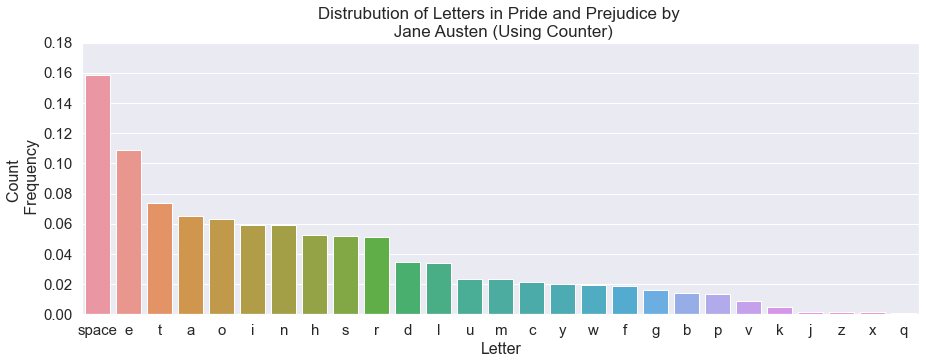

In [11]:
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x='letter', y='freq', data=df_freq)
plt.ylabel('Count \n Frequency', fontsize=16)
plt.xlabel('Letter', fontsize=16)
plt.ylim(0, 0.180, 0.025)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Distrubution of Letters in Pride and Prejudice by \n Jane Austen (Using Counter)', fontsize=17)
plt.show()

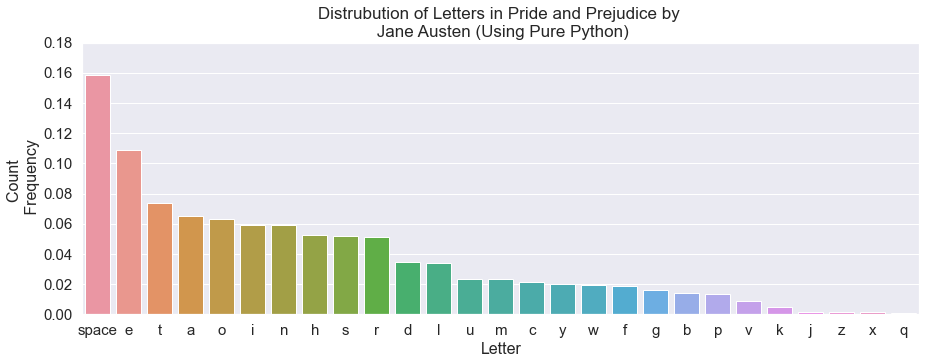

In [12]:
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x='letter', y='freq', data=df_freq)
plt.ylabel('Count \n Frequency', fontsize=16)
plt.xlabel('Letter', fontsize=16)
plt.ylim(0, 0.180, 0.025)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Distrubution of Letters in Pride and Prejudice by \n Jane Austen (Using Pure Python)', fontsize=17)
plt.show()

In [13]:
def generate_kgram(s, n):
    return Counter([s[i:i+n] for i in range(0, len(s), 1)])
df_clean.loc[:, 'kgrams'] = df_clean['clean_string'].apply(generate_kgram, args=[2])

In [14]:
df_clean.head()

,text,clean_string,clean_string_count,clean_string_count_py,kgrams
1,the project gutenberg ebook of pride and preju...,the project gutenberg ebook of pride and preju...,"{'t': 3, 'h': 1, 'e': 8, ' ': 7, 'p': 3, 'r': ...","{'a': 1, 'b': 2, 'c': 2, 'd': 3, 'e': 8, 'f': ...","{'th': 1, 'he': 1, 'e ': 2, ' p': 3, 'pr': 3, ..."
2,by jane austen,by jane austen,"{'b': 1, 'y': 1, ' ': 2, 'j': 1, 'a': 2, 'n': ...","{'a': 2, 'b': 1, 'c': 0, 'd': 0, 'e': 2, 'f': ...","{'by': 1, 'y ': 1, ' j': 1, 'ja': 1, 'an': 1, ..."
3,this ebook is for the use of anyone anywhere a...,this ebook is for the use of anyone anywhere a...,"{'t': 5, 'h': 4, 'i': 3, 's': 4, ' ': 13, 'e':...","{'a': 4, 'b': 1, 'c': 1, 'd': 1, 'e': 6, 'f': ...","{'th': 3, 'hi': 1, 'is': 2, 's ': 2, ' e': 1, ..."
4,almost no restrictions whatsoever. you may co...,almost no restrictions whatsoever you may copy it,"{'a': 3, 'l': 1, 'm': 2, 'o': 6, 's': 4, 't': ...","{'a': 3, 'b': 0, 'c': 2, 'd': 0, 'e': 3, 'f': ...","{'al': 1, 'lm': 1, 'mo': 1, 'os': 1, 'st': 2, ..."
5,give it away or,give it away or,"{'g': 1, 'i': 2, 'v': 1, 'e': 1, ' ': 3, 't': ...","{'a': 2, 'b': 0, 'c': 0, 'd': 0, 'e': 1, 'f': ...","{'gi': 1, 'iv': 1, 've': 1, 'e ': 1, ' i': 1, ..."


In [15]:
kgram_list_dict_py = [dict(each) for each in df_clean.kgrams.tolist()]
kgram_dist= {}
for d in kgram_list_dict_py:
    for k in d.keys():
        kgram_dist[k] = kgram_dist.get(k, 0) + d[k]

In [16]:
df_kgram = pd.DataFrame(kgram_dist.items(), columns=['kgram', 'count'])
df_kgram['kgram_len'] = df_kgram['kgram'].str.split(' ').str.len()
two_grams = df_kgram[df_kgram.kgram_len == 1]


In [17]:
two_grams = copy.deepcopy(two_grams)

two_grams.loc[:, 'first_pos'] = two_grams['kgram'].str[0]
two_grams.loc[:, 'second_pos'] = two_grams['kgram'].str[1]

In [18]:
df = two_grams[['kgram', 'count', 'first_pos', 'second_pos']]
df.head()

,kgram,count,first_pos,second_pos
0,th,14098,t,h
1,he,15044,h,e
4,pr,1494,p,r
5,ro,2060,r,o
6,oj,89,o,j


In [19]:
df_trans = df.pivot_table(index=['first_pos'], columns='second_pos', values='count')

In [20]:
df_trans['first_pos'] = df_trans.index

In [21]:
df_trans.reset_index(drop=True, inplace=True)
# df_trans.fillna(0) #need to comment out this line and change df_kgram #[df_kgram.kgram_len == 1] to df_kgram = [df_kgram.kgram_len == 1]

In [22]:
df_reorder = df_trans.reindex(columns=['first_pos',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z'])

In [23]:
df_reorder.head()

second_pos,first_pos,a,b,c,d,e,f,g,h,i,...,q,r,s,t,u,v,w,x,y,z
0,a,7.0,1562.0,1160.0,2447.0,8.0,473.0,899.0,6.0,1610.0,...,NaN,4270.0,4903.0,5818.0,517.0,1371.0,348.0,11.0,1229.0,23.0
1,b,292.0,7.0,NaN,1.0,4290.0,NaN,NaN,7.0,435.0,...,NaN,325.0,156.0,111.0,1144.0,1.0,NaN,NaN,692.0,NaN
2,c,1441.0,1.0,344.0,3.0,2575.0,NaN,NaN,2371.0,551.0,...,100.0,331.0,7.0,1440.0,375.0,NaN,NaN,NaN,509.0,NaN
3,d,1114.0,8.0,1.0,215.0,2623.0,25.0,124.0,12.0,2019.0,...,1.0,244.0,428.0,21.0,240.0,100.0,22.0,NaN,407.0,NaN
4,e,3165.0,78.0,1802.0,5544.0,1960.0,709.0,333.0,154.0,1087.0,...,198.0,11652.0,3739.0,2624.0,23.0,1430.0,389.0,745.0,1171.0,NaN


In [24]:
df_reorder['idxmax'] = df_reorder.iloc[:, 1:-1].idxmax(axis=1)
markov_pred_dict = dict(zip(df_reorder['first_pos'].tolist(), df_reorder['idxmax'].tolist()))
markov_pred_dict

{'a': 'n',
 'b': 'e',
 'c': 'o',
 'd': 'e',
 'e': 'r',
 'f': 'o',
 'g': 'h',
 'h': 'e',
 'i': 'n',
 'j': 'e',
 'k': 'e',
 'l': 'e',
 'm': 'e',
 'n': 'd',
 'o': 'u',
 'p': 'e',
 'q': 'u',
 'r': 'e',
 's': 'e',
 't': 'h',
 'u': 'r',
 'v': 'e',
 'w': 'a',
 'x': 'p',
 'y': 'o',
 'z': 'a'}

In [25]:
def markov(s):
    return markov_pred_dict[s]

def markov_sampler(char_init, n_iter, markov_dict):
    char_now = char_init
    markov_str = []
    n_iter = n_iter
    for i in range(n_iter):
        char_now = markov(char_now)
        markov_str.append(char_now)
    return ''.join(markov_str)

In [26]:
markov_string = markov_sampler(char_init='t', n_iter=3000, markov_dict=markov_pred_dict)
markov_string

'hererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererererer

In [27]:
len(markov_string)

3000

In [28]:
# Create Directed Graph

df_kgram = copy.deepcopy(df_kgram)
df_kgram.loc[:, 'first_pos'] = df_kgram['kgram'].str[0]
df_kgram.loc[:, 'second_pos'] = df_kgram['kgram'].str[1]
df_k = df_kgram[['kgram', 'count', 'first_pos', 'second_pos']]
df_ktrans = df_k.pivot_table(index=['first_pos'], columns='second_pos', values='count')
df_ktrans['first_pos'] = df_ktrans.index
df_ktrans.reset_index(drop=True, inplace=True)
df_ktrans.fillna(0) 

second_pos,,a,b,c,d,e,f,g,h,i,...,r,s,t,u,v,w,x,y,z,first_pos
0,0.0,10684.0,5187.0,4012.0,3368.0,2701.0,3645.0,1675.0,9233.0,6890.0,...,2049.0,7289.0,13894.0,894.0,791.0,7469.0,0.0,1915.0,1.0,
1,1981.0,7.0,1562.0,1160.0,2447.0,8.0,473.0,899.0,6.0,1610.0,...,4270.0,4903.0,5818.0,517.0,1371.0,348.0,11.0,1229.0,23.0,a
2,13.0,292.0,7.0,0.0,1.0,4290.0,0.0,0.0,7.0,435.0,...,325.0,156.0,111.0,1144.0,1.0,0.0,0.0,692.0,0.0,b
3,78.0,1441.0,1.0,344.0,3.0,2575.0,0.0,0.0,2371.0,551.0,...,331.0,7.0,1440.0,375.0,0.0,0.0,0.0,509.0,0.0,c
4,11770.0,1114.0,8.0,1.0,215.0,2623.0,25.0,124.0,12.0,2019.0,...,244.0,428.0,21.0,240.0,100.0,22.0,0.0,407.0,0.0,d
5,18631.0,3165.0,78.0,1802.0,5544.0,1960.0,709.0,333.0,154.0,1087.0,...,11652.0,3739.0,2624.0,23.0,1430.0,389.0,745.0,1171.0,0.0,e
6,4222.0,789.0,1.0,6.0,6.0,1145.0,588.0,2.0,8.0,847.0,...,865.0,7.0,425.0,380.0,0.0,2.0,0.0,45.0,0.0,f
7,3101.0,735.0,90.0,1.0,5.0,1322.0,2.0,35.0,1526.0,550.0,...,707.0,229.0,99.0,241.0,0.0,1.0,0.0,24.0,0.0,g
8,3499.0,6413.0,53.0,0.0,9.0,15044.0,11.0,0.0,4.0,4572.0,...,166.0,75.0,947.0,275.0,0.0,4.0,0.0,78.0,0.0,h
9,1946.0,735.0,338.0,1561.0,1368.0,1517.0,756.0,895.0,5.0,2.0,...,1481.0,4987.0,4988.0,22.0,927.0,1.0,56.0,0.0,770.0,i


In [29]:
new_col_list = ['first_pos',
 ' ',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

In [30]:
df_ktrans = df_ktrans.reindex(columns=new_col_list).fillna(0)
df_ktrans.rename(columns={' ': 'space'}, inplace=True)

In [31]:
df_ktrans['first_pos'][0]

' '

In [32]:
df_ktrans.loc[0, 'first_pos'] = 'space'

In [33]:
df_ktrans['total'] = df_ktrans.iloc[:, 0:].sum(axis=1)

In [34]:
df_ktrans.head()

second_pos,first_pos,space,a,b,c,d,e,f,g,h,...,r,s,t,u,v,w,x,y,z,total
0,space,0.0,10684.0,5187.0,4012.0,3368.0,2701.0,3645.0,1675.0,9233.0,...,2049.0,7289.0,13894.0,894.0,791.0,7469.0,0.0,1915.0,1.0,103750.0
1,a,1981.0,7.0,1562.0,1160.0,2447.0,8.0,473.0,899.0,6.0,...,4270.0,4903.0,5818.0,517.0,1371.0,348.0,11.0,1229.0,23.0,42456.0
2,b,13.0,292.0,7.0,0.0,1.0,4290.0,0.0,0.0,7.0,...,325.0,156.0,111.0,1144.0,1.0,0.0,0.0,692.0,0.0,9363.0
3,c,78.0,1441.0,1.0,344.0,3.0,2575.0,0.0,0.0,2371.0,...,331.0,7.0,1440.0,375.0,0.0,0.0,0.0,509.0,0.0,14101.0
4,d,11770.0,1114.0,8.0,1.0,215.0,2623.0,25.0,124.0,12.0,...,244.0,428.0,21.0,240.0,100.0,22.0,0.0,407.0,0.0,20646.0


In [35]:
df_ktrans_freq = df_ktrans.iloc[:, 1:].div(df_ktrans['total'] , axis=0)

In [36]:
idx_list = ['space',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

In [37]:
df_ktrans_freq_2 = df_ktrans_freq.iloc[:, 0:27]
df_ktrans_freq_2['idx'] = idx_list
df_ktrans_freq_2.set_index('idx', inplace=True)

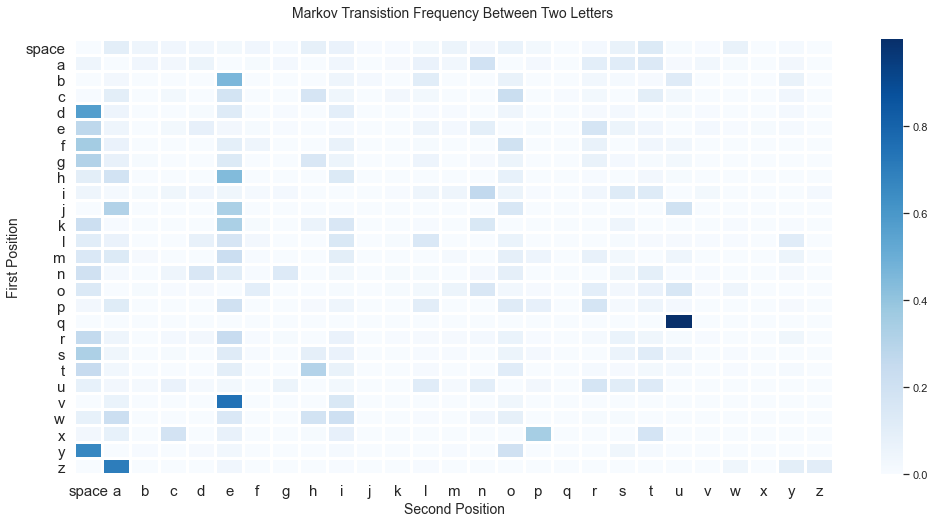

In [38]:
sns.set(rc={'figure.figsize':(17,8)})
sns.heatmap(df_ktrans_freq_2.iloc[:, 0:27], linewidths=2, yticklabels=1, cmap='Blues')
plt.ylabel('First Position', fontsize=14)
plt.xlabel('Second Position', fontsize=14)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.title('Markov Transistion Frequency Between Two Letters \n', fontsize=14)
plt.show()